In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
def load_measurement_file(name):
    return np.loadtxt(name)

def load_measurement_files_per_distance(glob_term):
    files = sorted(glob.glob(glob_term))
    measurements = [load_measurement_file(f) for f in files]
    return np.concatenate(measurements)


laser_id_to_angle = {
    0: -15,
    1: 1,
    2: -13,
    3: 3,
    4: -11,
    5: 5,
    6: -9,
    7: 7,
    8: -7,
    9: 9,
    10: -5,
    11: 11,
    12: -3,
    13: 13,
    14: -1,
    15: 15
}
laser_angle_to_id = {y:x for x,y in laser_id_to_angle.items()}
sorted_angles = sorted(laser_angle_to_id.keys())


In [3]:
def get_errors_per_laser(run):
    errors_per_laser = {}
    for angle in sorted_angles:
        distances_for_angle = run[np.where(run[:,5] == angle)][:, 0]
        errors_per_laser[laser_angle_to_id[angle]] = distances_for_angle
    return errors_per_laser

In [15]:
real_distances = load_measurement_files_per_distance("/home/brano/Projects/github_indoor++/pcds/error_measurements/distances/5m_2*wall.txt")
virtual_distances = load_measurement_files_per_distance("/home/brano/Projects/thesis/virtual_error_measurements/5m_0*wall_with_angles.txt")

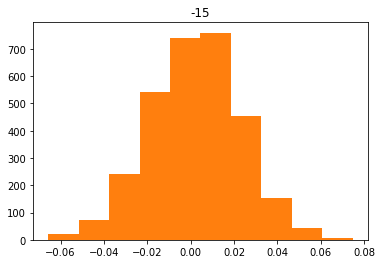

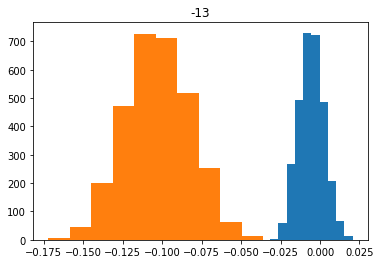

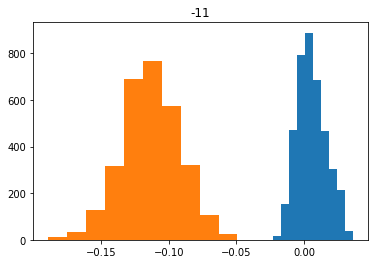

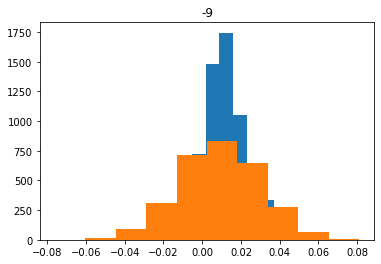

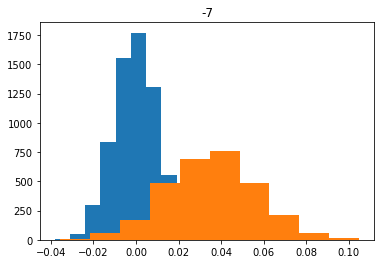

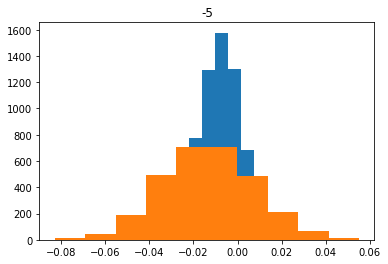

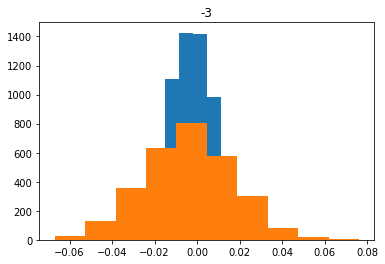

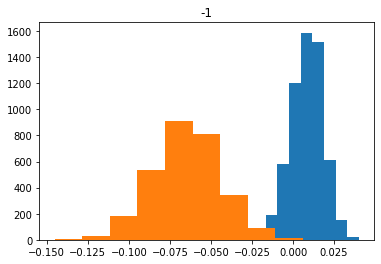

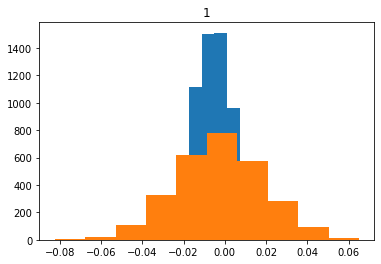

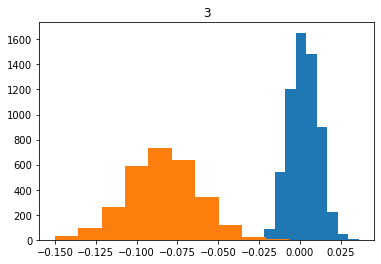

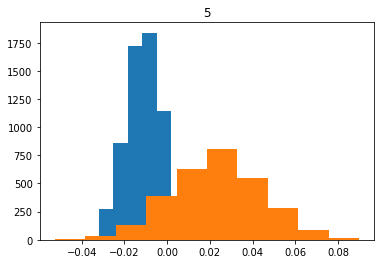

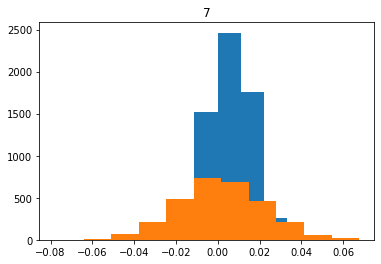

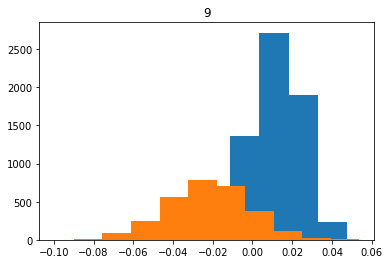

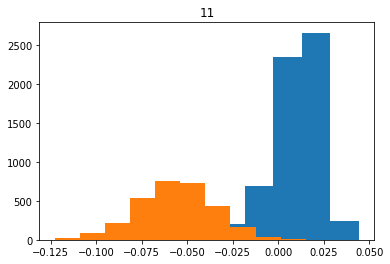

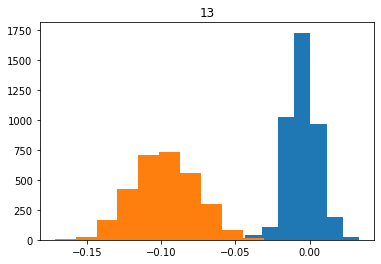

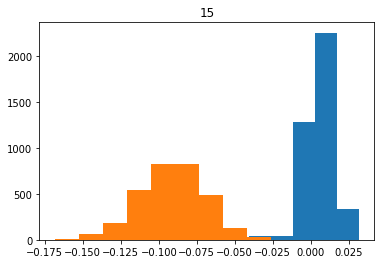

In [16]:
errors = get_errors_per_laser(real_distances)
virtual_errors = get_errors_per_laser(virtual_distances)
for k in virtual_errors.keys():
    plt.hist(errors[k])
    plt.hist(virtual_errors[k])
    plt.title(laser_id_to_angle[k])
    plt.show()